# Tutorial 2: High order pathology for the Stiffness matrix

In this example, we show the dependency of the **stiffness** symbol with respect to the spline degree in 1d.


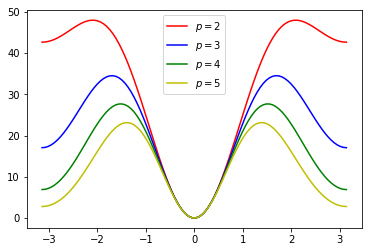

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from glt.expression import glt_symbol
from glt.expression import glt_lambdify
from numpy import linspace, pi

colors = ["r", "b", "g", "y", "m", "k", "c"]
for i,p in enumerate(range(2, 6)):
    
    # ... create a glt symbol from a string without evaluation
    expr = glt_symbol("Ni_x * Nj_x", \
                      dim=1, \
                      discretization={"n_elements": [32], "degrees": [p]}, \
                      evaluate=True)
    # ...
    
    # ...
    f = glt_lambdify(expr, dim=1)
    
    nx = 100
    x = linspace(  0, 1, nx)
    t = linspace(-pi,pi, nx)
    w = f(x,t)
    plt.plot(t, w.real, "-"+colors[i], label="$p=" + str(p) + "$")
    # ...
plt.legend(loc=9);

As expected, we notice the convergence to 0 at $| \theta | = \pi$.

Let's now devide the **stiffness** symbol by the **mass** symbol of degree $p-1$

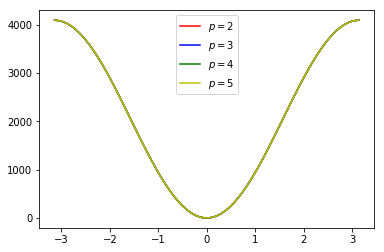

In [7]:
for i,p in enumerate(range(2, 6)):

    # ... create a glt symbol from a string without evaluation
    expr_s = glt_symbol("Ni_x * Nj_x", 
                        dim=1, 
                        discretization={"n_elements": [32], "degrees": [p]}, 
                        evaluate=True)
    # ...
    
    # ... create a glt symbol from a string without evaluation
    expr_m = glt_symbol("Ni * Nj", 
                        dim=1, 
                        discretization={"n_elements": [32], "degrees": [p-1]}, 
                        evaluate=True)
    # ...
       
    # ...
    f_s = glt_lambdify(expr_s, dim=1)
    f_m = glt_lambdify(expr_m, dim=1)
    
    nx = 100
    x = linspace(  0, 1, nx)
    t = linspace(-pi,pi, nx)
    w = f_s(x,t) / f_m(x,t)
    plt.plot(t, w.real, "-"+colors[i], label="$p=" + str(p) + "$")
    # ...
plt.legend(loc=9);